In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

question 1 

In [4]:
# read in a csv file  
file_path = '/content/train_wbcd .csv'
data = pd.read_csv(file_path)

In [6]:
# print the first 5 rows of the data set
print("First 5 rows of the data set: ")
print(data.head())

First 5 rows of the data set: 
   Patient_ID Diagnosis     f1     f2      f3      f4       f5       f6  \
0      909410         B  14.02  15.66   89.59   606.5  0.07966  0.05581   
1    84358402         M  20.29  14.34  135.10  1297.0  0.10030  0.13280   
2     8912284         B  12.89  15.70   84.08   516.6  0.07818  0.09580   
3    90317302         B  10.26  12.22   65.75   321.6  0.09996  0.07542   
4      914102         B  13.16  20.54   84.06   538.7  0.07335  0.05275   

        f7       f8  ...    f21    f22     f23     f24      f25     f26  \
0  0.02087  0.02652  ...  14.91  19.31   96.53   688.9  0.10340  0.1017   
1  0.19800  0.10430  ...  22.54  16.67  152.20  1575.0  0.13740  0.2050   
2  0.11150  0.03390  ...  13.90  19.69   92.12   595.6  0.09926  0.2317   
3  0.01923  0.01968  ...  11.38  15.65   73.23   394.5  0.13430  0.1650   
4  0.01800  0.01256  ...  14.50  28.46   95.29   648.3  0.11180  0.1646   

       f27      f28     f29      f30  
0  0.06260  0.08216  0.2136 

In [7]:
# print the feature names
print("Feature names: ")
for i in range(len(data.columns)):
    print("Column ", i, ": ", end="")  # identify what column number the feature is
    print(data.columns[i])


Feature names: 
Column  0 : Patient_ID
Column  1 : Diagnosis
Column  2 : f1
Column  3 : f2
Column  4 : f3
Column  5 : f4
Column  6 : f5
Column  7 : f6
Column  8 : f7
Column  9 : f8
Column  10 : f9
Column  11 : f10
Column  12 : f11
Column  13 : f12
Column  14 : f13
Column  15 : f14
Column  16 : f15
Column  17 : f16
Column  18 : f17
Column  19 : f18
Column  20 : f19
Column  21 : f20
Column  22 : f21
Column  23 : f22
Column  24 : f23
Column  25 : f24
Column  26 : f25
Column  27 : f26
Column  28 : f27
Column  29 : f28
Column  30 : f29
Column  31 : f30


In [8]:
print("Number of null values for each column: ")
# get the amount of null values in the data set
print(data.isnull().sum())

Number of null values for each column: 
Patient_ID    0
Diagnosis     0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
f11           0
f12           0
f13           0
f14           0
f15           0
f16           0
f17           0
f18           0
f19           0
f20           0
f21           2
f22           0
f23           0
f24           0
f25           0
f26           0
f27           0
f28           0
f29           0
f30           0
dtype: int64


question 2

In [9]:
# make a list variable for future use
missing_entries = []

In [10]:
# get the row indices of the null values in f21
row_indices = data[data['f21'].isnull()].index

In [11]:
# print the row and column indices of the null values
print("Row and column indices of the null values: ")
for i in range(len(row_indices)):
    # add in to the missing_entries list
    missing_entries.append((row_indices[i], data.columns.get_loc('f21')))
    # get the exact value of the index
    print("Row: ", row_indices[i], " Column: ", data.columns.get_loc('f21'))


Row and column indices of the null values: 
Row:  70  Column:  22
Row:  74  Column:  22


In [12]:
# print the missing entries
print("Missing entries: ")
print(missing_entries)

Missing entries: 
[(70, 22), (74, 22)]


In [13]:
missing_values = []

# get the value at the row and column indices of the missing entries list and print them out
print("Values at the row and column indices of the missing entries list: ")
for i in range(len(missing_entries)):
    missing_values.append(data.iloc[missing_entries[i][0], missing_entries[i][1]]) # add the missing values to the missing_values list
    print(data.iloc[missing_entries[i][0], missing_entries[i][1]])

Values at the row and column indices of the missing entries list: 
nan
nan


In [14]:
# fill in the missing values with the median value of the feature values from the training set
data = data.fillna(data.median())
# data = data.fillna(data.mean())

<ipython-input-14-3bad7510c097>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.median())


In [15]:
# check if there are any null values left
print("Number of null values AFTER: ")
print(data.isnull().sum().sum())

Number of null values AFTER: 
0


In [16]:
# check if the values have been updated
print("Values at the row and column indices of the missing entries list AFTER: ")
for i in range(len(missing_entries)):
    print(data.iloc[missing_entries[i][0], missing_entries[i][1]])



Values at the row and column indices of the missing entries list AFTER: 
15.315
15.315


In [17]:
    """
    There are varying reasons for choosing between mean and median to replace the missing values in the dataset 
    Mean: 
    - Sensitive to all data points: The mean considers all values in the data set, making it a good choice when the data is evenly distributed.
    - Mathematical properties: The mean has useful mathematical properties that can simplify further analysis.
    - Interval data: The mean is a good choice when the data is measured on an interval scale. 
    
    Median: 
    - Sensitive to outliers: The median is a good choice when the data is skewed or has outliers.
    - Robust: The median is a robust statistic, meaning that it is not affected by extreme values in the data set. 
    - Ordinal data: The median is a good choice when the data is ranked 
    """

'\nThere are varying reasons for choosing between mean and median to replace the missing values in the dataset \nMean: \n- Sensitive to all data points: The mean considers all values in the data set, making it a good choice when the data is evenly distributed.\n- Mathematical properties: The mean has useful mathematical properties that can simplify further analysis.\n- Interval data: The mean is a good choice when the data is measured on an interval scale. \n\nMedian: \n- Sensitive to outliers: The median is a good choice when the data is skewed or has outliers.\n- Robust: The median is a robust statistic, meaning that it is not affected by extreme values in the data set. \n- Ordinal data: The median is a good choice when the data is ranked \n'

question 3

In [18]:
# one-hot encoding
data = pd.get_dummies(data, columns=['Diagnosis']) # one-hot encoding the diagnosis column
print(data.head()) # print the first 5 rows of the data set after one-hot encoding

   Patient_ID     f1     f2      f3      f4       f5       f6       f7  \
0      909410  14.02  15.66   89.59   606.5  0.07966  0.05581  0.02087   
1    84358402  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
2     8912284  12.89  15.70   84.08   516.6  0.07818  0.09580  0.11150   
3    90317302  10.26  12.22   65.75   321.6  0.09996  0.07542  0.01923   
4      914102  13.16  20.54   84.06   538.7  0.07335  0.05275  0.01800   

        f8      f9  ...     f23     f24      f25     f26      f27      f28  \
0  0.02652  0.1589  ...   96.53   688.9  0.10340  0.1017  0.06260  0.08216   
1  0.10430  0.1809  ...  152.20  1575.0  0.13740  0.2050  0.40000  0.16250   
2  0.03390  0.1432  ...   92.12   595.6  0.09926  0.2317  0.33440  0.10170   
3  0.01968  0.1800  ...   73.23   394.5  0.13430  0.1650  0.08615  0.06696   
4  0.01256  0.1713  ...   95.29   648.3  0.11180  0.1646  0.07698  0.04195   

      f29      f30  Diagnosis_B  Diagnosis_M  
0  0.2136  0.06710            1        

In [19]:
"""
The purpose of one-hot encoding is to convert categorical data into a format that can be used by machine learning algorithms. 
It creates binary features for each category, indicating the presence or absence of a category for each data point.

One-hot encoding can be useful when dealing with diagnosing patients: For example 

- Handling categorical data: 
Medical data often contains categorical variables like symptoms, diagnoses, or treatment types. One-hot encoding allows algorithms to process 
these categories as numerical data.

- Model interpretability: 
One-hot encoded features make it easier to understand the contribution of each category to the diagnosis. 
For example, it's easier to see which symptoms are more indicative of a specific disease.

- Improved performance: 
Many machine learning algorithms perform better with numerical data. One-hot encoding helps improve model performance by converting categorical data into a numerical format.
"""

# the 0 and 1 values in the diagnosis column could indicate whether the patient has a malignant or benign tumor respectively based on the data set


"\nThe purpose of one-hot encoding is to convert categorical data into a format that can be used by machine learning algorithms. \nIt creates binary features for each category, indicating the presence or absence of a category for each data point.\n\nOne-hot encoding can be useful when dealing with diagnosing patients: For example \n\n- Handling categorical data: \nMedical data often contains categorical variables like symptoms, diagnoses, or treatment types. One-hot encoding allows algorithms to process \nthese categories as numerical data.\n\n- Model interpretability: \nOne-hot encoded features make it easier to understand the contribution of each category to the diagnosis. \nFor example, it's easier to see which symptoms are more indicative of a specific disease.\n\n- Improved performance: \nMany machine learning algorithms perform better with numerical data. One-hot encoding helps improve model performance by converting categorical data into a numerical format.\n"

In [20]:
data.to_csv('/content/train_wbcd_encoded.csv', index=False)  # save the data set with the encoded data into a csv file

question 4

In [21]:
# Get the features f1 to f30
features = data.iloc[:, 1:31]
print(features.head())

      f1     f2      f3      f4       f5       f6       f7       f8      f9  \
0  14.02  15.66   89.59   606.5  0.07966  0.05581  0.02087  0.02652  0.1589   
1  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
2  12.89  15.70   84.08   516.6  0.07818  0.09580  0.11150  0.03390  0.1432   
3  10.26  12.22   65.75   321.6  0.09996  0.07542  0.01923  0.01968  0.1800   
4  13.16  20.54   84.06   538.7  0.07335  0.05275  0.01800  0.01256  0.1713   

       f10  ...    f21    f22     f23     f24      f25     f26      f27  \
0  0.05586  ...  14.91  19.31   96.53   688.9  0.10340  0.1017  0.06260   
1  0.05883  ...  22.54  16.67  152.20  1575.0  0.13740  0.2050  0.40000   
2  0.05935  ...  13.90  19.69   92.12   595.6  0.09926  0.2317  0.33440   
3  0.06569  ...  11.38  15.65   73.23   394.5  0.13430  0.1650  0.08615   
4  0.05888  ...  14.50  28.46   95.29   648.3  0.11180  0.1646  0.07698   

       f28     f29      f30  
0  0.08216  0.2136  0.06710  
1  0.16250  0.

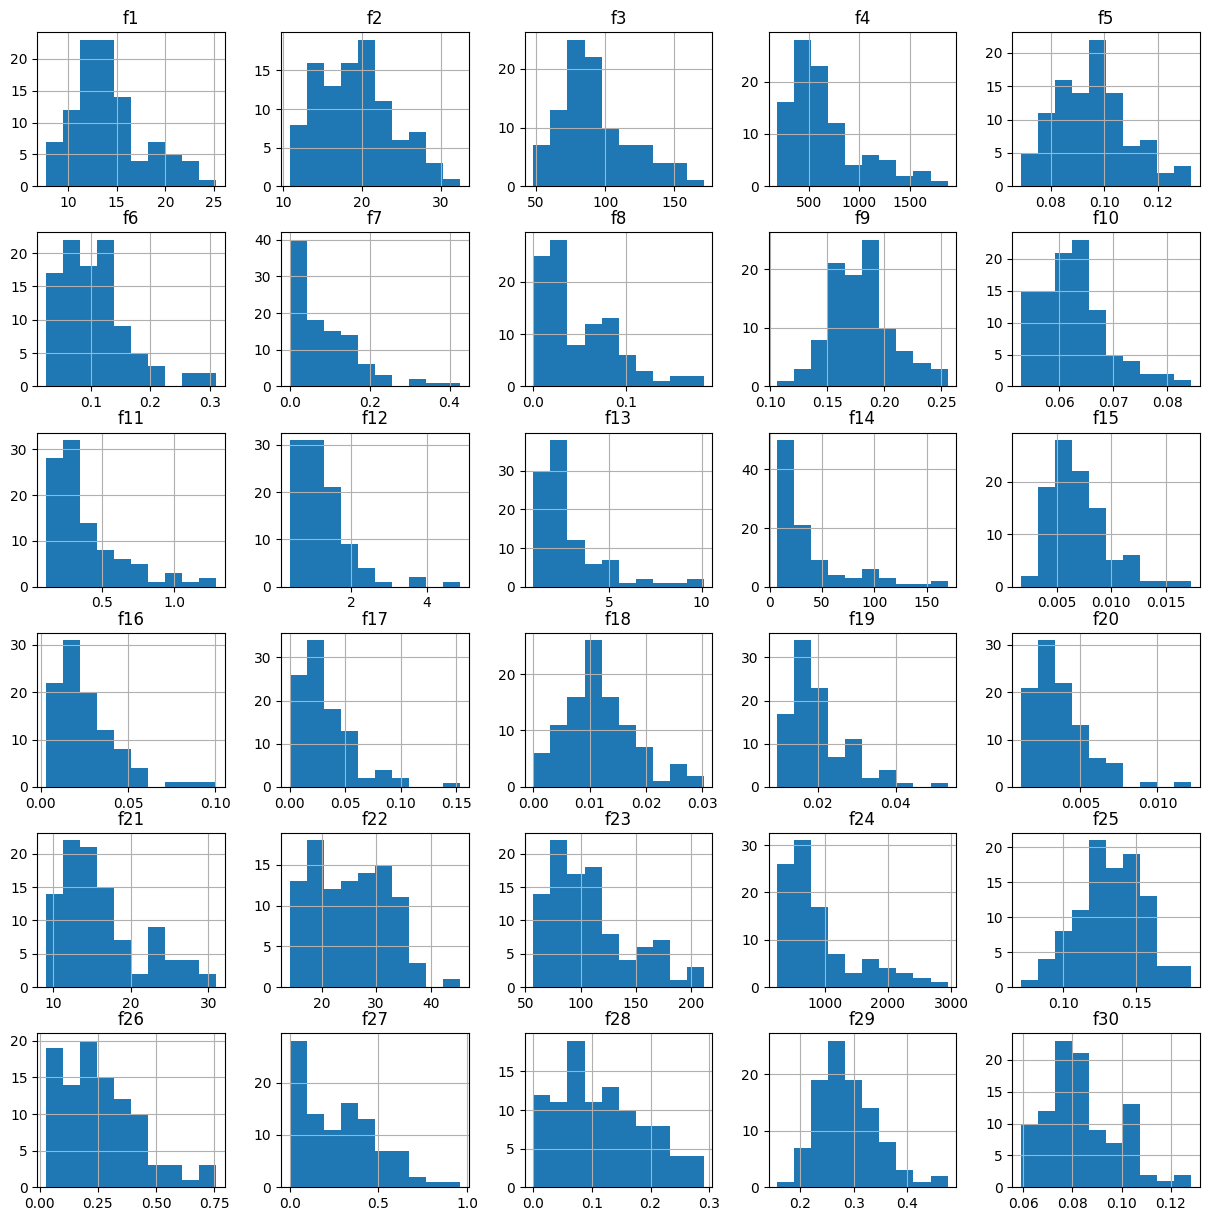

In [22]:
# Plot the distribution of the features before min-max scaling
pd.DataFrame.hist(data.iloc[:, 1:31], figsize=[15, 15])
plt.show()

In [23]:
# Apply min-max scaling to the features f1 to f30
features = (features - features.min()) / (features.max() - features.min())
print(features.head())

         f1        f2        f3        f4        f5        f6        f7  \
0  0.359671  0.223557  0.336869  0.251707  0.169829  0.112411  0.048945   
1  0.718141  0.162587  0.705311  0.658074  0.493492  0.379775  0.464353   
2  0.295066  0.225404  0.292260  0.198799  0.146621  0.251285  0.261492   
3  0.144703  0.064665  0.143863  0.084040  0.488161  0.180511  0.045098   
4  0.310503  0.448961  0.292098  0.211806  0.070880  0.101785  0.042214   

         f8        f9       f10  ...       f21       f22       f23       f24  \
0  0.143740  0.353610  0.092522  ...  0.265946  0.166401  0.254708  0.163539   
1  0.565312  0.500668  0.186629  ...  0.613824  0.082082  0.614961  0.492211   
2  0.183740  0.248663  0.203105  ...  0.219897  0.178537  0.226170  0.128932   
3  0.106667  0.494652  0.403992  ...  0.105002  0.049505  0.103928  0.054340   
4  0.068076  0.436497  0.188213  ...  0.247253  0.458639  0.246683  0.148479   

        f25       f26       f27       f28       f29       f30  
0  0

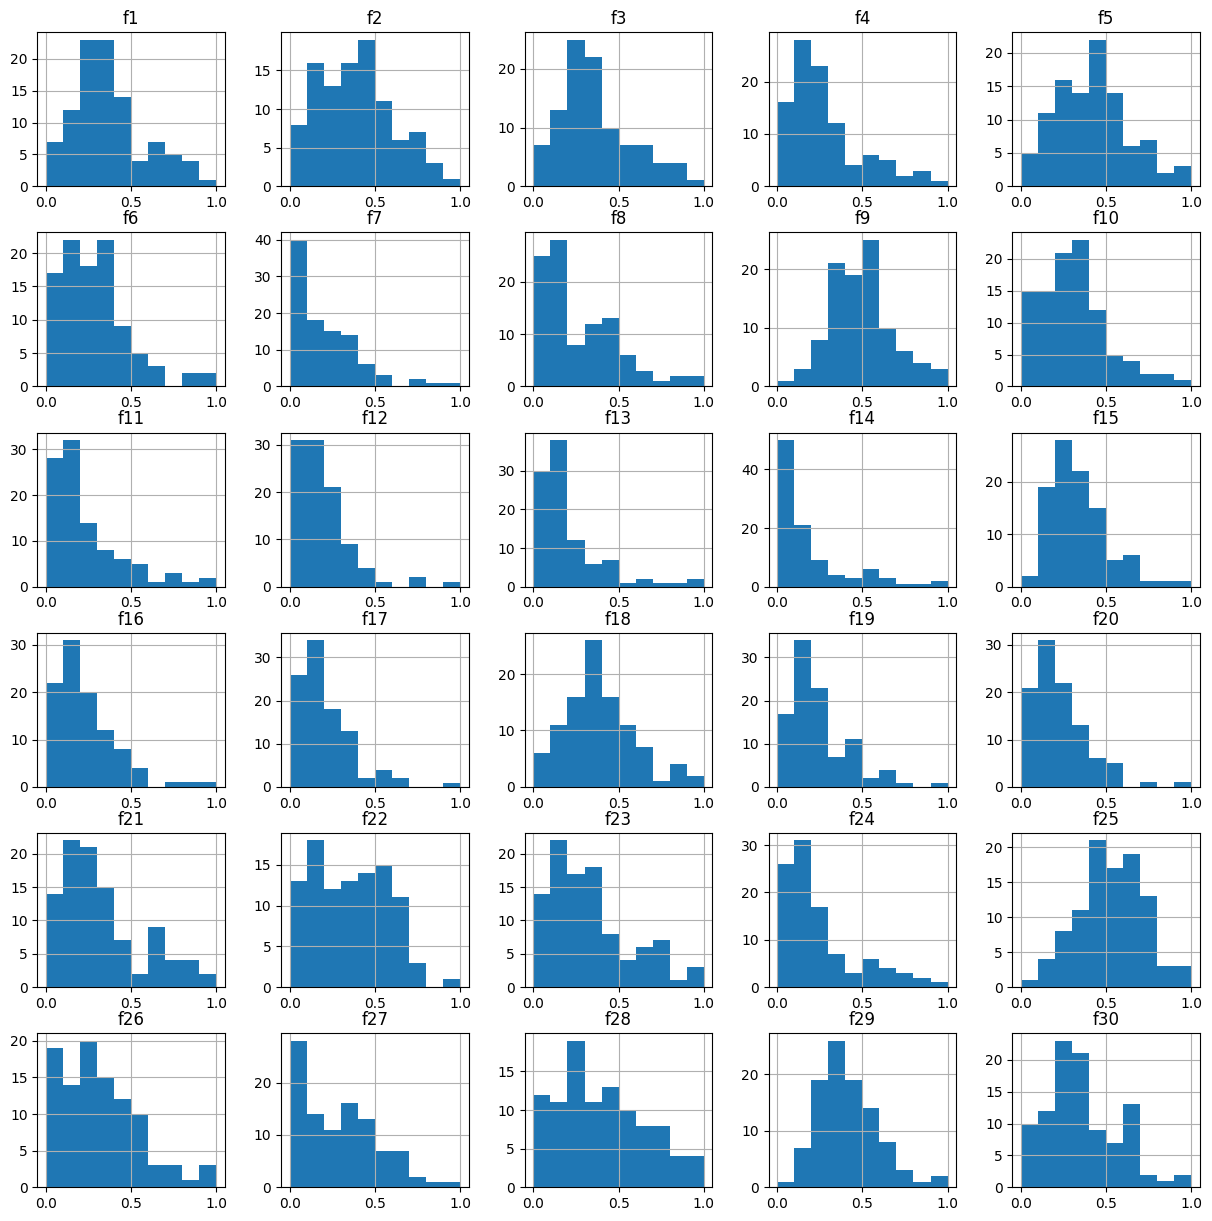

In [24]:
# Plot the distribution of the features after min-max scaling
pd.DataFrame.hist(features, figsize=[15, 15])
plt.show()

In [25]:
# the difference between the distribution of the features before and after min-max scaling is that the distribution
# of the features after scaling are uniform because the data is scaled to a fixed range.

# Min-max scaling transforms the features to a common scale, typically [0, 1],
# by subtracting the minimum value and dividing by the range (maximum - minimum) for each feature.
# After scaling, the distributions of the features will still have the same shape,
# but their values will be constrained within the [0, 1] range.
# This can improve the performance of machine learning algorithms that are sensitive to the scale of input features.


In [26]:
# save the data set with the encoded data and the scaled features into a csv file
data.iloc[:, 1:31] = features
data.to_csv('/content/train_wbcd_encoded_scaled.csv', index=False)

<ipython-input-27-2f074e30b6eb>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.DataFrame.hist(data.iloc[:, 1:31], ax=axes[0])
<ipython-input-27-2f074e30b6eb>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.DataFrame.hist(features, ax=axes[1])


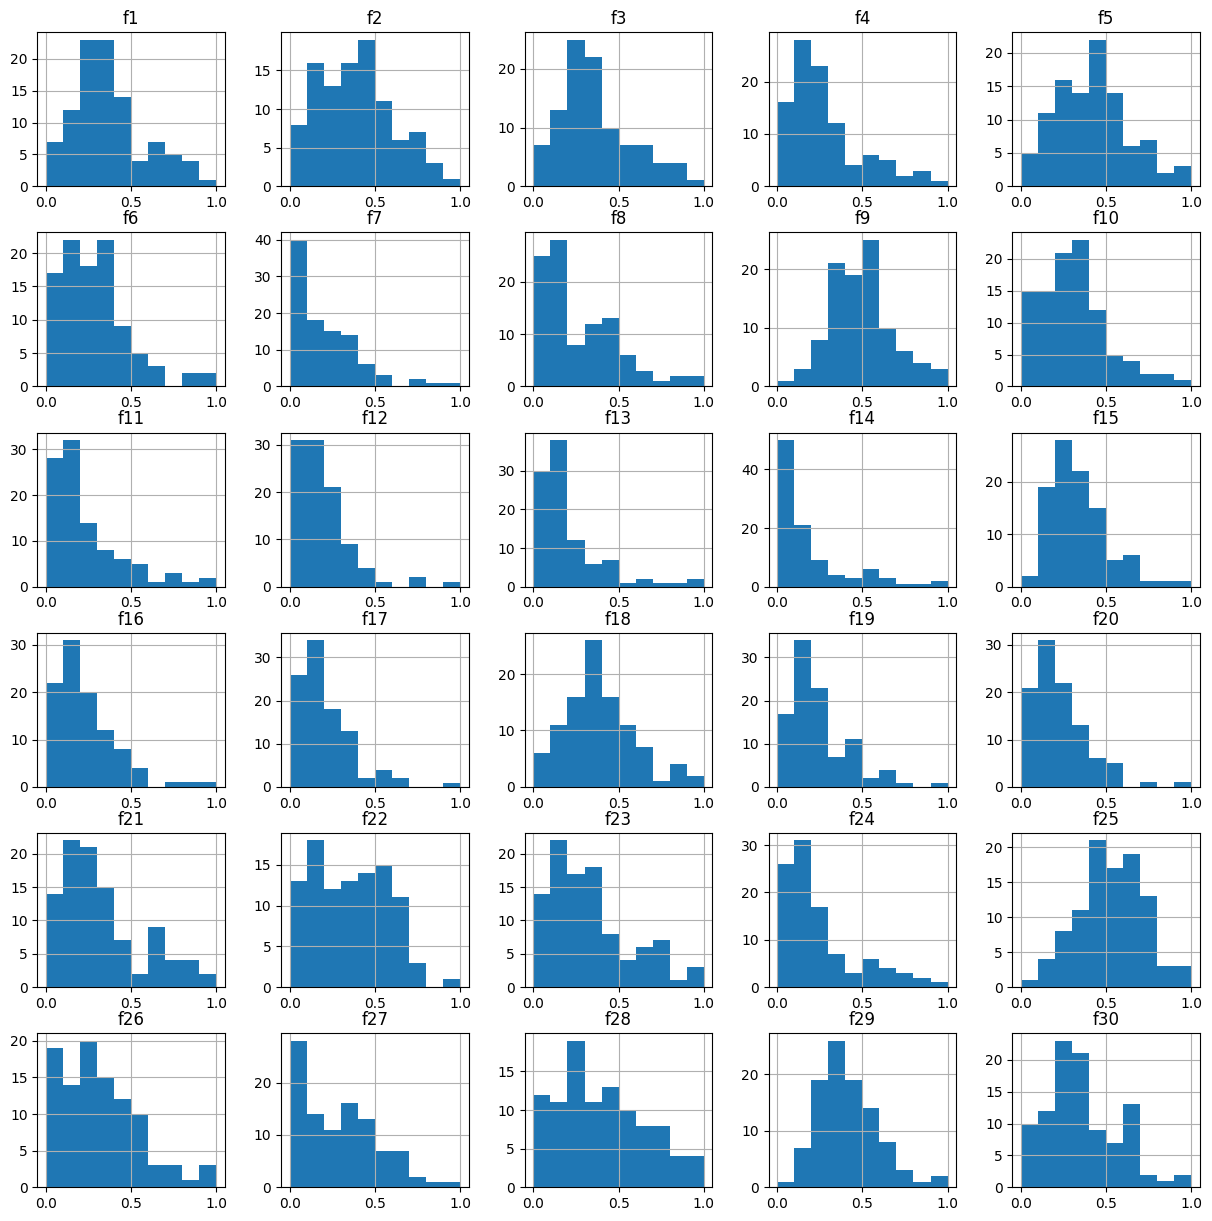

In [27]:
# plot the distribution of the features before and after min-max scaling to compare the difference
fig, axes = plt.subplots(2, 1, figsize=(15, 15))
pd.DataFrame.hist(data.iloc[:, 1:31], ax=axes[0])
pd.DataFrame.hist(features, ax=axes[1])
plt.show()